<a href="https://colab.research.google.com/github/kckiran01/CSC550/blob/master/resnet34_avg_image_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/csc591_avg'
train_dir='/content/drive/MyDrive/csc591_avg/train_swipeLeft'
test_dir='/content/drive/MyDrive/csc591_avg/test_swipeLeft'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


You should rescale your data as dividing 1/255 to transform your pixel value from a range [0,255 ] to [0,1] to behave all images the same. After that, you can flow your images from their directories by specifying some parameters. The target size parameter helps you to resize your image as you specified. If you have two classes you should set the class mode parameter as “binary”.

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#All images will be rescaled by 1./255 which may not necessary in our case though...Kiran

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

#Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir, # This is the cource directory for training images
    target_size=(256,256), # All images will be resized..not sure if this is necessary--- Kiran
    batch_size = 20,
    class_mode='categorical')

# Flow validation images in batches of 8 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (256,256),
    batch_size=10,
    shuffle=False,
    class_mode='categorical')


Found 600 images belonging to 30 classes.
Found 600 images belonging to 30 classes.


In [3]:
import tensorflow as tf
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(256,256,3)),
                                    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(20, activation = 'relu'),
                                    tf.keras.layers.Dense(30, activation='softmax')
])



In [4]:
train_generator.classes

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11,
       11, 11, 11, 11, 11

TRAIN: There are  30 classes:
 ['Kiran KC', 'Jyoti KCPokhrel', 'Baburam Bhandari', 'Hital Patel', 'Arvind Singh Vaish', 'Hemant Patel', 'Dikendra Karki', 'Javid', 'Hema Patel', 'Baldev Raj', 'Mashud', 'Mohammed', 'Kritika Karki', 'Neha Vaish', 'Neeta Rijal', 'Narayan Bhandari', 'Neha Rijal', 'Martin', 'Neil Patel', 'Meena Patel', 'Reza Noori', 'Prafulla Pokhrel', 'Sangita Bhandari', 'Vikhil Patel', 'Rina Patel', 'Surendra Katuwal', 'Pramila Bhandari', 'Shyam Lamichhane', 'Sudam Pokhrel', 'Tulashi Maya Bhandari']
TEST: There are  30 classes:
 ['Baburam Bhandari', 'Dikendra Karki', 'Arvind Singh Vaish', 'Baldev Raj', 'Hemant Patel', 'Hema Patel', 'Hital Patel', 'Jyoti KCPokhrel', 'Mohammed', 'Meena Patel', 'Martin', 'Javid', 'Narayan Bhandari', 'Kritika Karki', 'Mashud', 'Kiran KC', 'Pramila Bhandari', 'Neil Patel', 'Sangita Bhandari', 'Shyam Lamichhane', 'Prafulla Pokhrel', 'Neha Vaish', 'Rina Patel', 'Neha Rijal', 'Neeta Rijal', 'Reza Noori', 'Surendra Katuwal', 'Vikhil Patel', 'Tulash

/usr/local/lib/python3.7/dist-packages/fastai/vision/transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  return _solve_func(B,A)[0][:,0]
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/free

ImageDataBunch;

Train: LabelList (600 items)
x: ImageList
Image (3, 4, 15),Image (3, 4, 15),Image (3, 4, 15),Image (3, 4, 15),Image (3, 4, 15)
y: CategoryList
Baburam Bhandari,Baburam Bhandari,Baburam Bhandari,Baburam Bhandari,Baburam Bhandari
Path: /content/drive/MyDrive/csc591_avg;

Valid: LabelList (600 items)
x: ImageList
Image (3, 4, 15),Image (3, 4, 15),Image (3, 4, 15),Image (3, 4, 15),Image (3, 4, 15)
y: CategoryList
Arvind Singh Vaish,Arvind Singh Vaish,Arvind Singh Vaish,Arvind Singh Vaish,Arvind Singh Vaish
Path: /content/drive/MyDrive/csc591_avg;

Test: None
There are 600 training images and 600 validation images.
['Arvind Singh Vaish', 'Baburam Bhandari', 'Baldev Raj', 'Dikendra Karki', 'Hema Patel', 'Hemant Patel', 'Hital Patel', 'Javid', 'Jyoti KCPokhrel', 'Kiran KC', 'Kritika Karki', 'Martin', 'Mashud', 'Meena Patel', 'Mohammed', 'Narayan Bhandari', 'Neeta Rijal', 'Neha Rijal', 'Neha Vaish', 'Neil Patel', 'Prafulla Pokhrel', 'Pramila Bhandari', 'Reza Noori', 'Rina Pate

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,accuracy,time
0,4.805286,18.129168,0.041667,01:23
1,4.790685,41.771637,0.055000,00:04
2,4.685698,20.293011,0.051667,00:04
3,4.597489,20.316216,0.051667,00:04
4,4.321906,28.176468,0.048333,00:04
5,4.127975,8.176664,0.046667,00:04
6,3.930987,13.865197,0.073333,00:04
7,3.837174,10.290686,0.065000,00:04
8,3.799899,8.725714,0.081667,00:04
9,3.827214,8.382961,0.070000,00:04


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


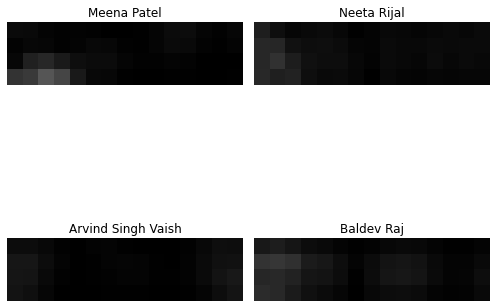

In [5]:
from fastai.vision import *
from fastai.metrics import error_rate

classes = []
for d in os.listdir(train_dir):
    if os.path.isdir(os.path.join(train_dir, d)) and not d.startswith('.'):
        classes.append(d) 
print ("TRAIN: There are ", len(classes), "classes:\n", classes) 
#for c in classes:
    #print ("Class:", c)
    #verify_images(os.path.join(train_dir, c), delete=True);

classes = []
for d in os.listdir(test_dir):
    if os.path.isdir(os.path.join(test_dir, d)) and not d.startswith('.'):
        classes.append(d) 
print ("TEST: There are ", len(classes), "classes:\n", classes) 


#for c in classes:
    #print ("Class:", c)
    #verify_images(os.path.join(train_dir, c), delete=True);


#train_data  = ImageDataBunch.from_folder(train_dir, ds_tfms=get_transforms(), valid_pct=0.0).normalize(imagenet_stats)
#test_data  = ImageDataBunch.from_folder(test_dir, ds_tfms=get_transforms(), valid_pct=1.0).normalize(imagenet_stats)

'''
old method
data = (ImageList.from_folder(train_dir)
.split_by_folder()
.label_from_folder()
.add_test_folder(test_dir)
.databunch(bs=64)

)
'''

data = ImageDataBunch.from_folder(path, train='train_swipeRight', valid='test_swipeRight', 
                                  ds_tfms=get_transforms(do_flip=False), bs=8, num_workers=4)

data.show_batch(rows=2, figsize=(7,8))

print(data)
#print(test_data)

#data = train_generator 

#learn = cnn_learner(data, models.resnet34, metrics=accuracy)

print ("There are", len(data.train_ds), "training images and", len(data.valid_ds), "validation images." )

# See the classes and count of classes in your dataset
print(data.classes,data.c)
print ("training dataset>>>> ")
print(data.train_dl)

#print(stopper)
# See the number of images in each data set
print(len(data.train_ds), len(data.valid_ds))

# Build the CNN model with the pretrained resnet34
# Error rate = 1 - accuracy
learn = cnn_learner(data, models.resnet34, metrics = [accuracy])
# Train the model on 4 epochs of data at the default learning rate
learn.fit_one_cycle(10)


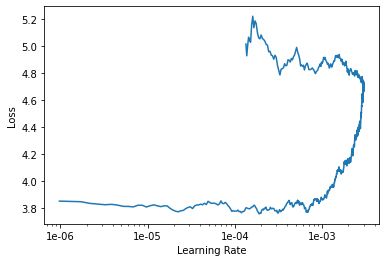

In [6]:
#learn.lr_find();
learn.recorder.plot()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


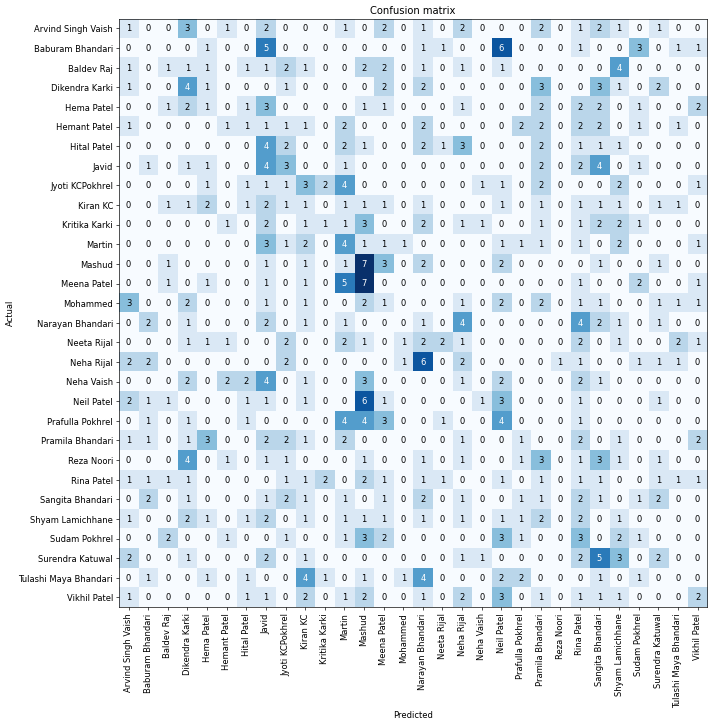

In [7]:
# Rebuild interpreter and replot confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [8]:
'''
from tensorflow.keras.optimizers import RMSprop
model.summary()
model.compile(
    loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    steps_per_epoch=20, #total images = batch_size * steps--kiran
    epochs=30,
    validation_data=validation_generator,
    validation_steps=20 # total images = batch_size * steps--kiran
)
'''

'\nfrom tensorflow.keras.optimizers import RMSprop\nmodel.summary()\nmodel.compile(\n    loss=\'categorical_crossentropy\',\n    optimizer="adam",\n    metrics=[\'accuracy\']\n)\n\nhistory = model.fit(\n    train_generator,\n    steps_per_epoch=20, #total images = batch_size * steps--kiran\n    epochs=30,\n    validation_data=validation_generator,\n    validation_steps=20 # total images = batch_size * steps--kiran\n)\n'

In [9]:
'''
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, recall_score, accuracy_score, precision_score
Y_pred = model.predict_generator(validation_generator,60) # class is 30, so put 29
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(Y_pred)
print('y pred >>> ')
print(y_pred)
#print(confusion_matrix(validation_generator.classes, y_pred))
print('classfication report')
print(str(np.mean(recall_score(validation_generator.classes, y_pred, average=None))))
accuracy =(accuracy_score(validation_generator.classes, y_pred))*100
print(str(accuracy))
prec= np.mean(precision_score(validation_generator.classes, y_pred, average=None))*100
print(str(prec)).
'''

"\nimport numpy as np\nfrom sklearn.metrics import classification_report, confusion_matrix, recall_score, accuracy_score, precision_score\nY_pred = model.predict_generator(validation_generator,60) # class is 30, so put 29\ny_pred = np.argmax(Y_pred, axis=1)\nprint('Confusion Matrix')\nprint(Y_pred)\nprint('y pred >>> ')\nprint(y_pred)\n#print(confusion_matrix(validation_generator.classes, y_pred))\nprint('classfication report')\nprint(str(np.mean(recall_score(validation_generator.classes, y_pred, average=None))))\naccuracy =(accuracy_score(validation_generator.classes, y_pred))*100\nprint(str(accuracy))\nprec= np.mean(precision_score(validation_generator.classes, y_pred, average=None))*100\nprint(str(prec)).\n"